<a href="https://colab.research.google.com/github/D1scoDancer/Bankruptcy-DA-Project/blob/main/Notebooks/Taiwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo
!pip install seaborn scikit-learn

# Импорты

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка данных

### Получение данных

In [3]:
# fetch taiwanese dataset
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572)

# data (as pandas dataframes)
taiwanese_X = taiwanese_bankruptcy_prediction.data.features
taiwanese_y = taiwanese_bankruptcy_prediction.data.targets

# Анализ данных

## Тайвань

#### X

In [11]:
taiwanese_X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [7]:
columns_to_extract = [
    ' ROA(A) before interest and % after tax',
    ' Total debt/Total net worth',
    ' Working Capital to Total Assets',
    ' Retained Earnings to Total Assets',
    ' Total Asset Turnover',
    ' Operating Profit Rate',
]

# Создаем новый DataFrame, содержащий только выбранные столбцы
taiwanese_X_sub = taiwanese_X[columns_to_extract]

# Показываем первые несколько строк нового DataFrame
taiwanese_X_sub

,ROA(A) before interest and % after tax,Total debt/Total net worth,Working Capital to Total Assets,Retained Earnings to Total Assets,Total Asset Turnover,Operating Profit Rate
0,0.424389,0.021266,0.672775,0.903225,0.086957,0.998969
1,0.538214,0.012502,0.751111,0.931065,0.064468,0.998946
2,0.499019,0.021248,0.829502,0.909903,0.014993,0.998857
3,0.451265,0.009572,0.725754,0.906902,0.089955,0.998700
4,0.538432,0.005150,0.751822,0.913850,0.175412,0.998973
...,...,...,...,...,...,...
6814,0.539468,0.006655,0.817769,0.925611,0.103448,0.998992
6815,0.538269,0.004623,0.793387,0.932629,0.103448,0.998992
6816,0.533744,0.001392,0.866047,0.932000,0.106447,0.998984
6817,0.559911,0.003816,0.832340,0.939613,0.109445,0.999074


##### Correlation

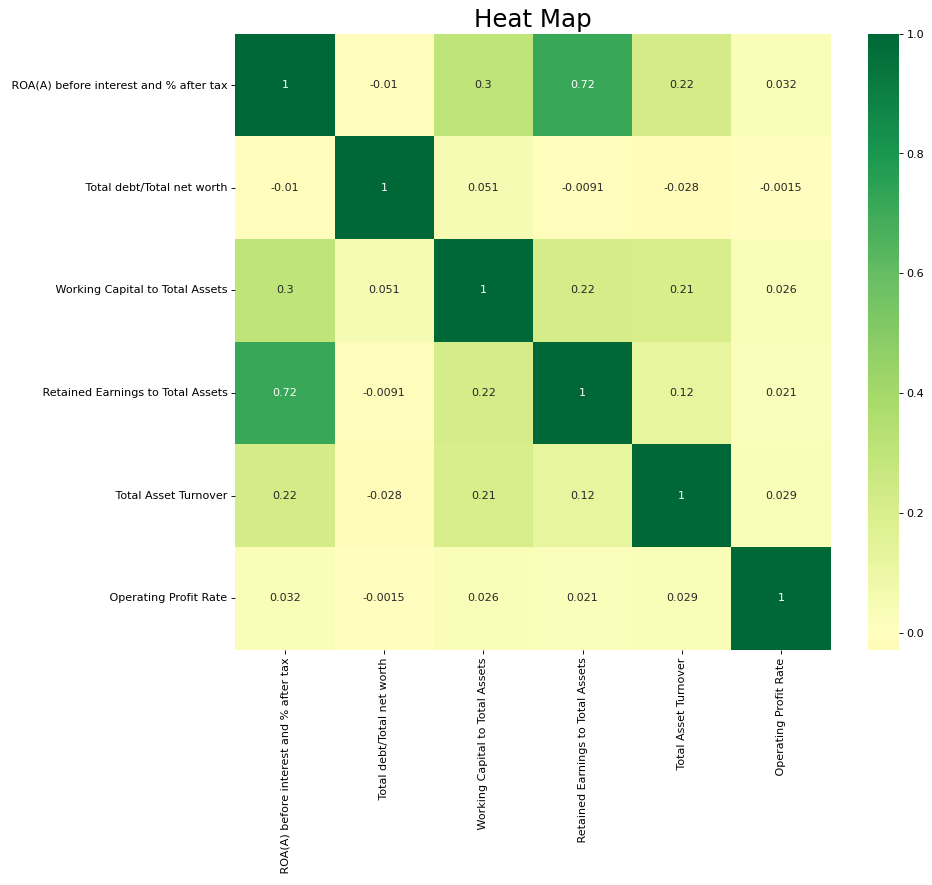

In [13]:
plt.figure(figsize=(12,10), dpi= 80) # размер картинки
sns.heatmap(taiwanese_X_sub.corr(), cmap='RdYlGn', center=0, annot=True)
plt.title('Heat Map', fontsize=22);

#### y

In [9]:
taiwanese_y

,class
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


##### Баланс классов

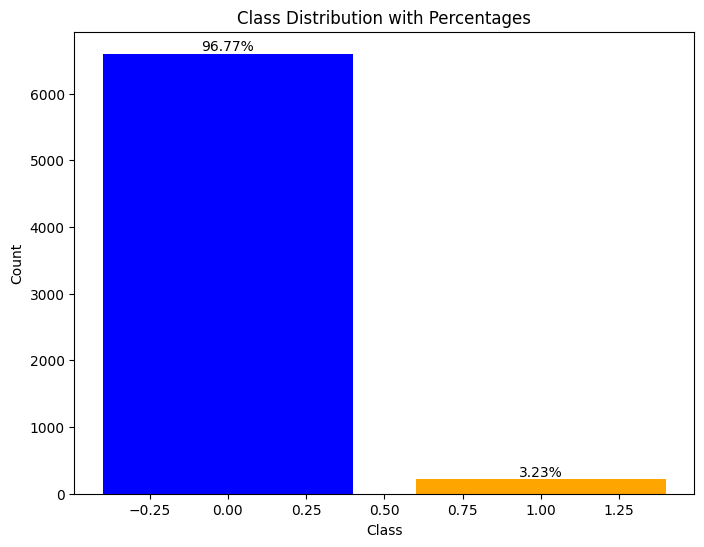

In [8]:
# Calculate the percentage distribution
class_counts = taiwanese_y['class'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color=['blue', 'orange'])

for bar, percentage in zip(bars, class_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution with Percentages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Построение моделей

Использовать SMOTE?

### Модель Альтмана (Z-score)

## Логистическая регрессия

## Наша модель